# Import Data

In [0]:
!cp "/content/drive/My Drive/College notes/Sem VI/PM/suicide-rates-overview-1985-to-2016.zip" /content/

In [0]:
!unzip /content/suicide-rates-overview-1985-to-2016.zip

Archive:  /content/suicide-rates-overview-1985-to-2016.zip
  inflating: master.csv              


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/content/master.csv')

In [0]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
df.shape

(27820, 12)

# Preprocessing

## Remove NAs

In [0]:
df.isna().sum()/df.shape[0]*100

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [0]:
df.drop(['HDI for year'], axis=1, inplace=True)

In [0]:
X, y = df.drop(['suicides_no', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) '], axis=1), df['suicides_no']

In [0]:
X.dtypes

country               object
year                   int64
sex                   object
age                   object
population             int64
gdp_per_capita ($)     int64
generation            object
dtype: object

## One-hot Categorical Variables

In [0]:
X.head()

,country,year,sex,age,population,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,796,Generation X
1,Albania,1987,male,35-54 years,308000,796,Silent
2,Albania,1987,female,15-24 years,289700,796,Generation X
3,Albania,1987,male,75+ years,21800,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,796,Boomers


In [0]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,year,population,gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Grenada,...,country_Qatar,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,312900,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1987,308000,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1987,289700,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1987,21800,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,1987,274300,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


## Scale Continous Variables

In [0]:
X['years_ago'] = 2020-X['year']
X.drop(['year'], axis=1, inplace=True)
X.head()

,population,gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Grenada,country_Guatemala,...,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,years_ago
0,312900,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,33
1,308000,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,33
2,289700,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,33
3,21800,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,33
4,274300,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,33


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X['population'] = scaler.fit_transform(X[['population']])
X['gdp_per_capita ($)'] = scaler.fit_transform(X[['gdp_per_capita ($)']])
X['years_ago'] = scaler.fit_transform(X[['years_ago']])
X.head()

,population,gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Grenada,country_Guatemala,...,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,years_ago
0,0.007137,0.004322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.935484
1,0.007025,0.004322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.935484
2,0.006607,0.004322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.935484
3,0.000491,0.004322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0.935484
4,0.006256,0.004322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.935484


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exploratory Data Analysis

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Descriptive Statistics

In [0]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


## Pearson Correlation Heatmap

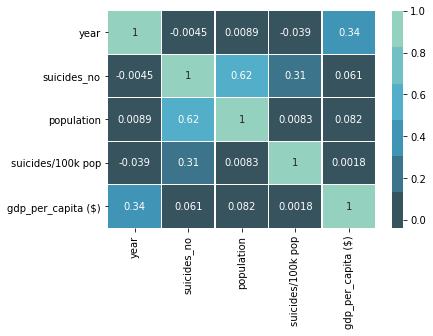

In [0]:
sns.heatmap(df.corr(), cmap=sns.color_palette("GnBu_d"), annot=True, linewidths=0.25)
plt.show()

## Pairplot

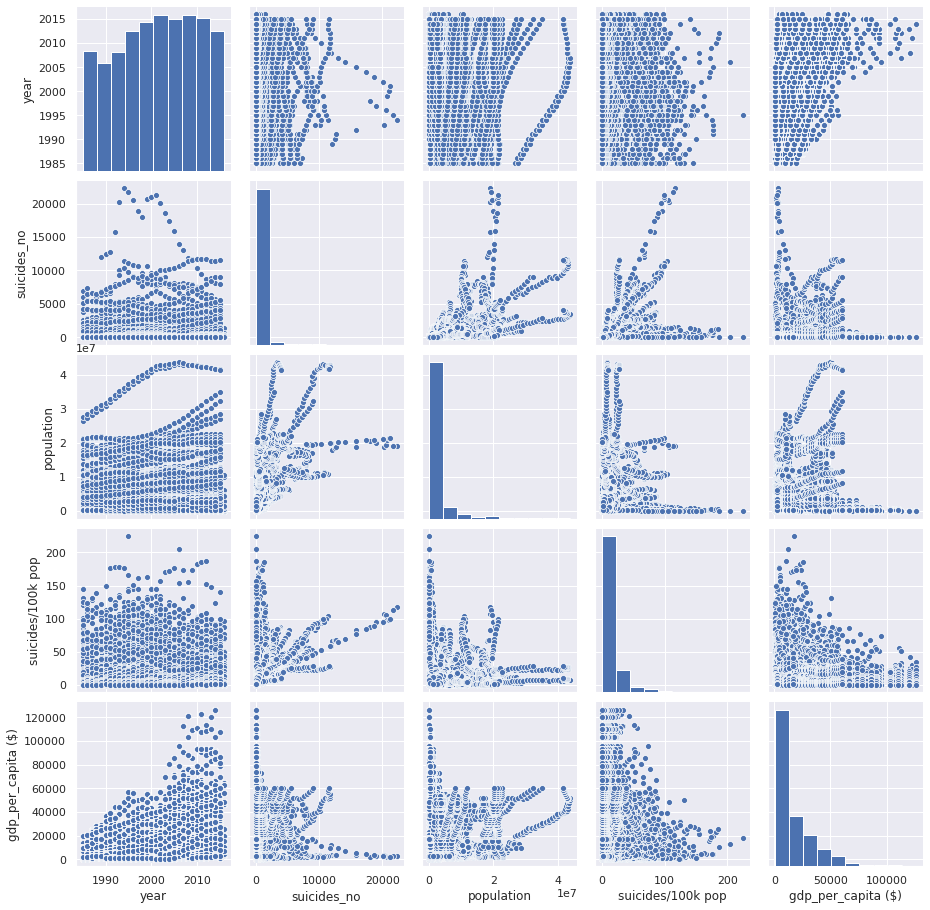

In [0]:
sns.set()
sns.pairplot(df)
plt.show()

## Number of Suicides vs Year Segregated by Generation

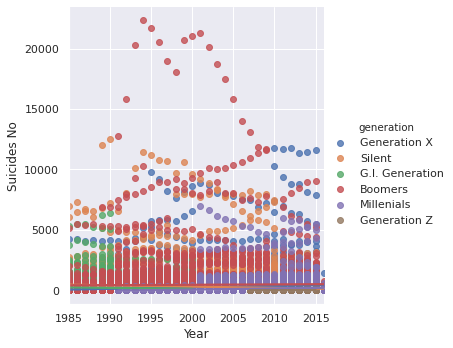

In [0]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation", truncate=True, height=5, data=df)
g.set_axis_labels("Year", "Suicides No")
plt.show()

## Generation Descriptive Stats

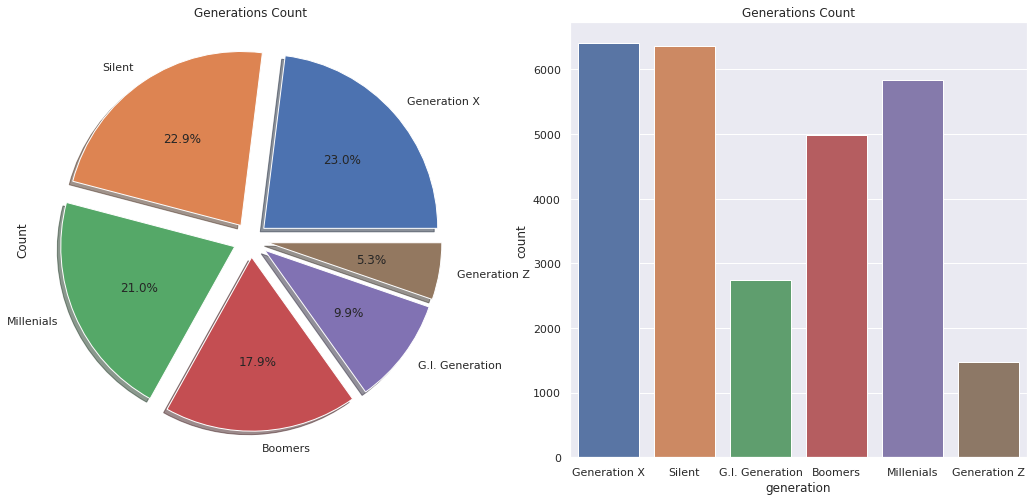

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['generation'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('generation', data=df, ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

## Boxen plot for Number of Suicides vs Generation

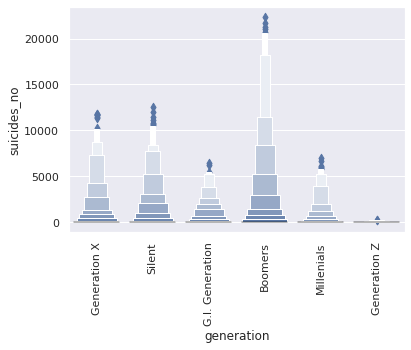

In [0]:
sns.boxenplot(x="generation", y="suicides_no", color="b", scale="linear", data=df)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Number of Suicides vs Country

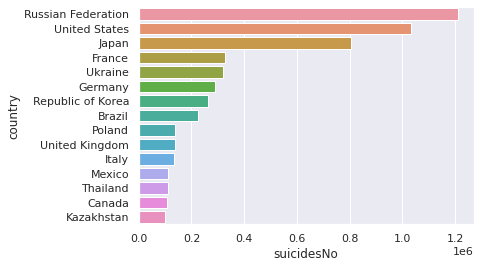

In [0]:
suicidesNo = []
for country in df['country'].unique():
    suicidesNo.append(sum(df[df['country']==country].suicides_no)) 
suicidesNo = pd.DataFrame(suicidesNo, columns=['suicidesNo'])
country = pd.DataFrame(df.country.unique(), columns=['country'])
data_suicide_countr = pd.concat([suicidesNo, country], axis=1)
data_suicide_countr = data_suicide_countr.sort_values(by='suicidesNo', ascending=False)
sns.barplot(y=data_suicide_countr.country[:15], x=data_suicide_countr.suicidesNo[:15])
plt.show()

## Number of Suicides per 100k population vs Country

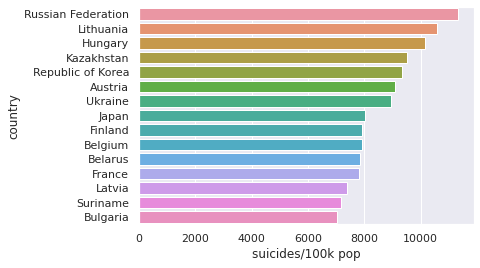

In [0]:
suicidesperpop = []
for country in df['country'].unique():
    suicidesperpop.append(sum(df[df['country']==country]['suicides/100k pop'])) 
suicidesperpop = pd.DataFrame(suicidesperpop, columns=['suicides/100k pop'])
country = pd.DataFrame(df.country.unique(), columns=['country'])
data_suicide_countr = pd.concat([suicidesperpop, country], axis=1)
data_suicide_countr = data_suicide_countr.sort_values(by='suicides/100k pop', ascending=False)
sns.barplot(y=data_suicide_countr.country[:15], x=data_suicide_countr['suicides/100k pop'][:15])
plt.show()

## Number of observations segregated on Gender and Age Groups

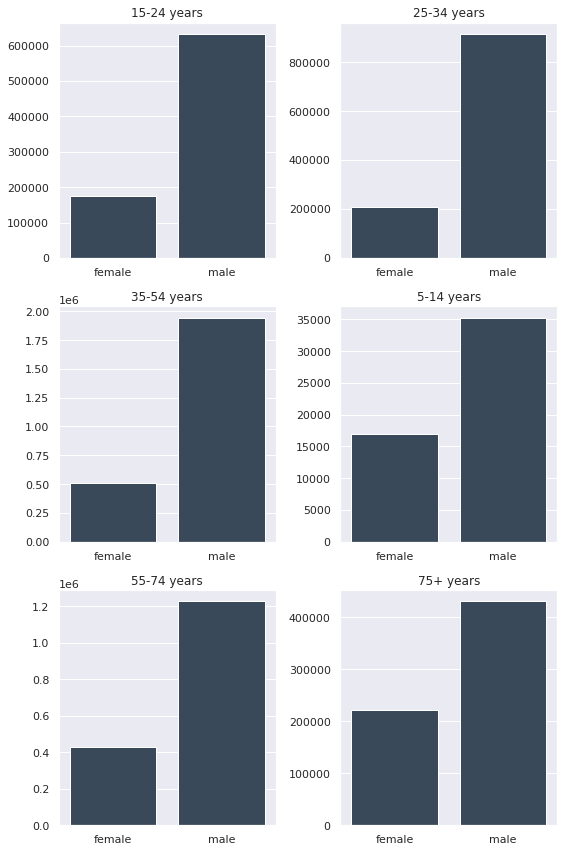

In [0]:
sns.set()
female_ = [175437, 208823, 506233, 16997, 430036, 221984]
male_ = [633105, 915089, 1945908, 35267, 1228407, 431134]
for i, age in enumerate(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']):
    plt.subplot(3, 2, i+1)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female', 'male'], y=[female_[i],male_[i]], color="#34495e")
    plt.tight_layout()
    fig.set_size_inches(8, 12)
plt.show()

## Joint plot for Suicides/Population vs Year

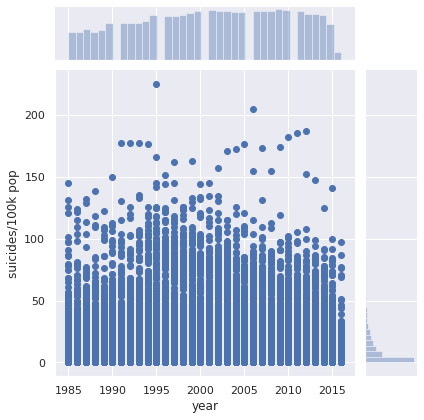

In [0]:
fig = sns.jointplot(y='suicides/100k pop', x='year', data=df)
plt.show()

## Joint plot for Suicides vs Year

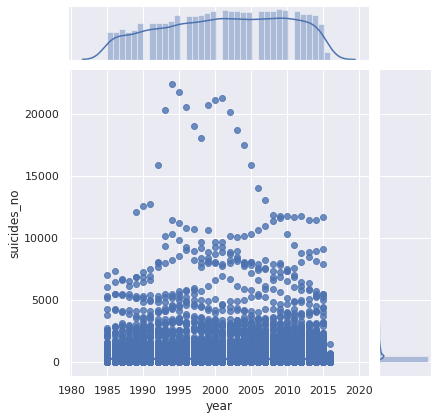

In [0]:
sns.jointplot("year", "suicides_no", data=df, kind="reg")
plt.show()

## Joint plot for GDP per Capita vs Year

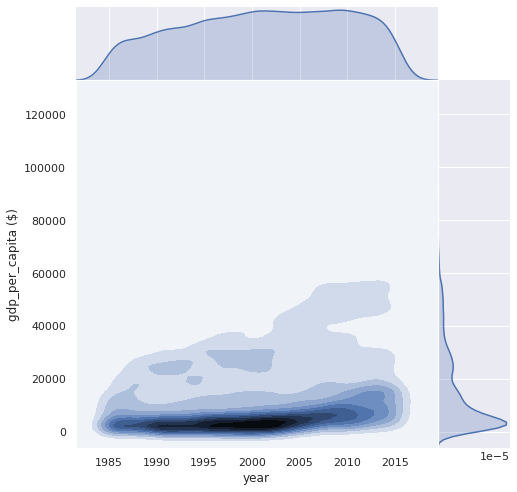

In [0]:
g = sns.jointplot(df['year'], df['gdp_per_capita ($)'], kind="kde", height=7, space=0)
plt.show()

# Models

In [0]:
RMSE={}
R2={}

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lin_reg = LinearRegression()

In [0]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_reg.predict(X_test)

In [0]:
r2 = r2_score(y_test, y_pred)
print('R2 score for Linear Regression:', r2)
R2['Linear'] = r2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score for Linear Regression:', rmse)
RMSE['Linear'] = rmse

R2 score for Linear Regression: 0.5844931536309839
RMSE score for Linear Regression: 545.802695310348


## Huber(Robust Regressor)

In [0]:
from sklearn.linear_model import HuberRegressor

In [0]:
huber = HuberRegressor(max_iter=1000)

In [0]:
huber.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=1000,
               tol=1e-05, warm_start=False)

In [0]:
y_pred = huber.predict(X_test)

In [0]:
r2 = r2_score(y_test, y_pred)
print('R2 score for Huber Regression:', r2)
R2['Huber'] = r2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score for Huber Regression:', rmse)
RMSE['Huber'] = rmse

R2 score for Huber Regression: 0.43807786949747374
RMSE score for Huber Regression: 634.7236085293894


## Lasso(L1 Regularization)

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lasso = Lasso(random_state=42)

In [0]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred = lasso.predict(X_test)

In [0]:
r2 = r2_score(y_test, y_pred)
print('R2 score for Lasso Regression:', r2)
R2['Lasso'] = r2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score for Lasso Regression:', rmse)
RMSE['Lasso'] = rmse

R2 score for Lasso Regression: 0.5835465016940042
RMSE score for Lasso Regression: 546.4240944836795


## Poly

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=True)),
                  ('lasso', Lasso(random_state=42))])
model = model.fit(X_train, y_train)

In [0]:
y_pred = model.predict(X_test)

In [0]:
r2 = r2_score(y_test, y_pred)
print('R2 score for Polynomial Regression:', r2)
R2['Polynomial'] = r2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score for Polynomial Regression:', rmse)
RMSE['Polynomial'] = rmse

R2 score for Polynomial Regression: 0.8512962539047108
RMSE score for Polynomial Regression: 326.51830892068546


## Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(random_state=42)

In [0]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [0]:
r2 = r2_score(y_test, y_pred)
print('R2 score for Random Forest Regression:', r2)
R2['Random Forest'] = r2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score for Random Forest Regression:', rmse)
RMSE['Random Forest'] = rmse

R2 score for Random Forest Regression: 0.9889497076551526
RMSE score for Random Forest Regression: 89.00890695103912


## Plots

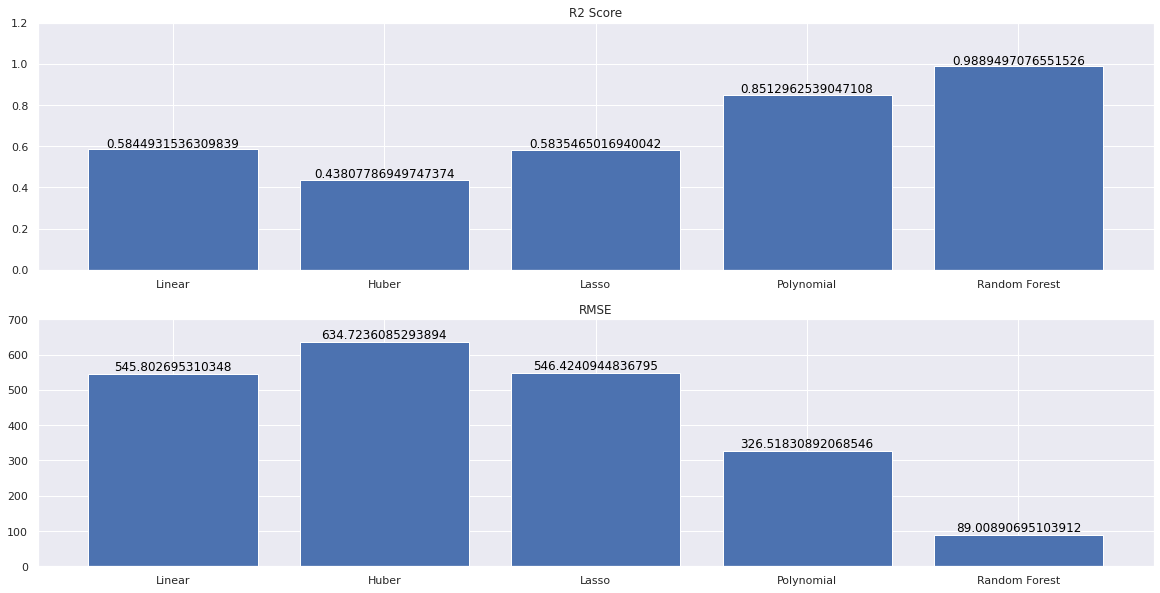

In [0]:
sns.set()
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.bar(range(len(R2)), R2.values(), align='center')
plt.xticks(range(len(R2)), list(R2.keys()))
plt.title('R2 Score')
plt.ylim(0, 1.2)
for i, v in enumerate(R2.values()):
    plt.text(i, v + 0.01, str(v), color='black', horizontalalignment='center')

plt.subplot(212)
plt.bar(range(len(RMSE)), RMSE.values(), align='center')
plt.xticks(range(len(RMSE)), list(RMSE.keys()))
plt.title('RMSE')
plt.ylim(0, 700)
for i, v in enumerate(RMSE.values()):
    plt.text(i, v + 10, str(v), color='black', horizontalalignment='center')
plt.show()

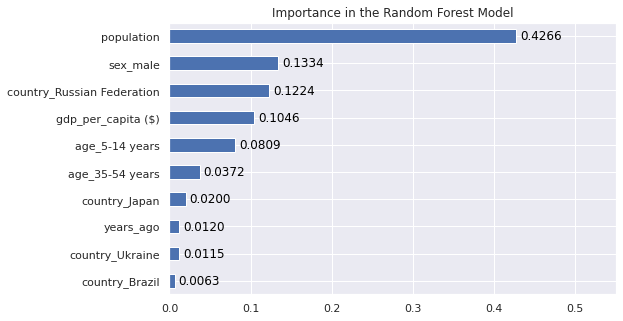

In [53]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values()[-10:]

sns.set()
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
feature_importances.plot(kind = "barh")
plt.title("Importance in the Random Forest Model")
plt.xlim(0, 0.55)
for i, v in enumerate(feature_importances):
    plt.text(v+0.005, i, "{:.4f}".format(v), color='black', verticalalignment='center')
plt.show()

In [55]:
set(df['sex'])

{'female', 'male'}